In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Подготовительная часть задания

In [3]:
# Загрузить ДФ
#path = '/Users/vladislavkravchenko/Desktop/WORK_IT/1.Elbrus_Bootcamp/2.Phase0/4.Thursday/rent_real_estate/_data.csv'
df = pd.read_csv('_data.csv')
pd.set_option('display.max_columns', None)

In [37]:
df

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,Сдаётся светлая теплая квартира (студия) с бал...,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,Сдам однокомнатную квартиру на длительный срок...,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,Рассматриваются квартиранты только славяне и т...,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,

In [4]:
# Выбор рабочих колонок, анализ которых позволяет провести графическую аналитику
df.rename(columns={'ID  объявления': 'ID объявления'}, inplace=True)
wdf = df[['Unnamed: 0',
    'ID объявления',  
   'Количество комнат', 
   'Метро', 
   'Площадь, м2', 
   'Дом', 
   'Парковка', 
   'Цена', 
   'Ремонт', 
   'Балкон', 
   'Окна', 
   'Санузел', 
   'Можно с детьми/животными',  
   'Высота потолков, м', 
   'Лифт', 
   'Мусоропровод']].copy()

In [5]:
# Замена нулевых значений
wdf.fillna(0, inplace=True)
wdf.isnull().sum()

Unnamed: 0                  0
ID объявления               0
Количество комнат           0
Метро                       0
Площадь, м2                 0
Дом                         0
Парковка                    0
Цена                        0
Ремонт                      0
Балкон                      0
Окна                        0
Санузел                     0
Можно с детьми/животными    0
Высота потолков, м          0
Лифт                        0
Мусоропровод                0
dtype: int64

In [6]:
# Шэйп ДФ для сверки результатов
wdf.shape

(23368, 16)

## Основная часть задания

### Колонка: Количество комнат. 
Задача: привести к типу int()

In [7]:
# Сплит по знаку запятой и взять только числа.
wdf = wdf.copy()
wdf['Количество комнат'] = wdf['Количество комнат'].apply(lambda x: x.split(',')[0] if type(x) != int else x)

In [8]:
wdf['Количество комнат'].value_counts()

Количество комнат
2    8466
1    7931
3    4262
4    1163
0    1041
5     367
6     138
Name: count, dtype: int64

In [9]:
# Проверка, что все значения численные
all(wdf['Количество комнат'].to_list()) == int()

True

### Колонка: Метро. 
Задача: оставить только название станции

In [10]:
wdf['Метро'] = wdf['Метро'].apply(lambda x: x.split() if type(x) == str else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x[1] if type(x) == list else x)
wdf['Метро'].value_counts()


Метро
0              1315
Проспект        644
Улица           409
Селигерская     393
Щелковская      313
               ... 
Нахабино          1
Лужники           1
Яхромская         1
Румянцево         1
Волковская        1
Name: count, Length: 309, dtype: int64

### Колонка: Площадь, м2. 
Задача: оставить только первое значение = общая площадь, последнее значение = площадь кухни

In [11]:
wdf['Площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x.split('/') if type(x) == str else x)
wdf['Площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x[:] if len(x) == 2 else [x[0],x[-1]])
wdf['Площадь, м2'].value_counts()

Площадь, м2
[40.0, 10.0]      371
[45.0, 6.0]       344
[38.0, 8.0]       216
[38.0, 10.0]      198
[40.0, 9.0]       193
                 ... 
[146.0, 12.0]       1
[165.0, 116.0]      1
[158.6, 12.0]       1
[202.2, 202.2]      1
[205.0, 17.0]       1
Name: count, Length: 5372, dtype: int64

### Колонка: Дом. 
Задача: привести к списку вида [этаж, количество этажей, тип строения]

In [12]:
# Разделим по запятой
wdf['Дом'] = wdf['Дом'].apply(lambda x: x.split() if type(x) == str else [x])
# Уберем запятую в первом значении каждого списка
wdf['Дом'] = wdf['Дом'].apply(lambda x: [x[0].replace(',',''), x[1]] if len(x) >1 and type(x[0]) == str else x)
# Приведем данные к виду [x/x, text]
wdf['Дом'] = wdf['Дом'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Привед данные к виду [этаж, количество этажей, тип строения]
wdf['Дом'] = wdf['Дом'].apply(lambda x: [*x[0].split('/'), x[1]])
# Приведем данные этажа и количества этажей к числовому типу
wdf['Дом'] = wdf['Дом'].apply(lambda x: [int(x[0]), int(x[1]), x[2]])

### Колонка: Парковка.

In [13]:
# Данные по парковке чистые, не требуют преобразования
wdf['Парковка'].value_counts()

Парковка
0                 13417
наземная           6043
подземная          2772
открытая           1017
многоуровневая      118
на крыше              1
Name: count, dtype: int64

### Колонка: Ремонт.

In [14]:
# Данные по ремонту чистые, не требуют преобразования
wdf['Ремонт'].value_counts()

Ремонт
Косметический    8499
Евроремонт       8470
Дизайнерский     3474
0                2755
Без ремонта       170
Name: count, dtype: int64

### Колонка: Балкон. 
Задача: Привести данные к виду [num1 , num2], где num1 = Балкон, num2 = Лоджия

In [15]:
# Сплит данных по запятой
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: x.split(', ') if type(x) == str else [x, x])
# Приведем данные к виду [num1, num2]
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Вытащим числовое значение в данных по балконам и приведем к числовому типу
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: [int(x[0][-2]), x[1]] if type(x[0]) == str else x)
# Вытащим числовое значение в данных по лоджиям и приведем к числовому типу
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: [x[0], int(x[1][-2])] if type(x[1]) == str else x)
wdf['Балкон'].value_counts()

Балкон
[1, 0]    13435
[0, 0]     7978
[2, 0]     1042
[1, 1]      716
[3, 0]      100
[2, 2]       25
[1, 2]       24
[2, 1]       20
[4, 0]       11
[3, 1]        5
[1, 3]        5
[2, 3]        3
[1, 4]        2
[3, 3]        1
[4, 4]        1
Name: count, dtype: int64

### Колонка: Окна

In [20]:
# Данные по окнам чистые, не требуют обработки
wdf['Окна'].value_counts()

Окна
Во двор            10870
0                   6613
На улицу и двор     3295
На улицу            2590
Name: count, dtype: int64

### Колонка: Санузел. 
Задача: Привести данные к виду [num1 , num2], где num1 = Совмещенный, num2 = Раздельный

In [21]:
# Сплит данных по запятой
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: x.split(', ') if type(x) == str else [x, x])
# Приведем данные к виду [num1, num2]
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Вытащим числовое значение в данных по балконам и приведем к числовому типу
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: [int(x[0][-2]), x[1]] if type(x[0]) == str else x)
# Вытащим числовое значение в данных по лоджиям и приведем к числовому типу
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: [x[0], int(x[1][-2])] if type(x[1]) == str else x)
wdf['Санузел'].value_counts()

Санузел
[1, 0]    17236
[0, 0]     2672
[2, 0]     1971
[1, 1]      812
[3, 0]      293
[2, 1]      188
[4, 0]       92
[1, 2]       30
[3, 1]       27
[2, 2]       25
[3, 3]        6
[4, 1]        6
[4, 2]        4
[2, 3]        2
[1, 3]        2
[2, 4]        1
[3, 2]        1
Name: count, dtype: int64

### Колонка: Можно с детьми/животными. 

In [16]:
# Данные по лояльности к существам с потенциальным риском нанесения материального ущерба чистые, не требуют обработки
wdf['Можно с детьми/животными'].value_counts()

Можно с детьми/животными
Можно с детьми                       10134
Можно с детьми, Можно с животными     6899
0                                     6096
Можно с животными                      239
Name: count, dtype: int64

### Колонка: Высота потолков, м. 
Задача: Убрать выбросы  
### разве среднее не считается без учета пропущенных значений? !!!!!!!!!!! разобраться

In [18]:
# Определим среднее значение высоты потолка
wdf[wdf['Высота потолков, м'].apply(lambda x: 2 < x < 4)]['Высота потолков, м'].mean()
# Получили значение 2.7
# Заменим выбросы на среднее значение высоты потолка
wdf['Высота потолков, м'] = wdf['Высота потолков, м'].apply(lambda x: 2.7 if x > 10 else x)
wdf['Высота потолков, м'].value_counts()

Высота потолков, м
0.00    12162
2.64     4467
3.00     1322
2.70     1058
2.48      676
        ...  
3.41        1
3.24        1
3.21        1
1.20        1
3.02        1
Name: count, Length: 85, dtype: int64

### Колонка: Лифт. 
Задача: Убрать выбросы

In [19]:
# Сплит данных по запятой
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: x.split(', ') if type(x) == str else [x, x])
# Приведем данные к виду [num1, num2]
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Вытащим числовое значение в данных по балконам и приведем к числовому типу
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: [int(x[0][-2]), x[1]] if type(x[0]) == str else x)
# Вытащим числовое значение в данных по лоджиям и приведем к числовому типу
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: [x[0], int(x[1][-2])] if type(x[1]) == str else x)
wdf['Лифт'].value_counts()

Лифт
[1, 0]    6006
[0, 0]    5504
[2, 0]    4346
[1, 1]    3962
[2, 1]    1224
[2, 2]     654
[3, 0]     651
[4, 0]     371
[3, 1]     187
[1, 2]     186
[4, 2]      65
[4, 1]      64
[3, 3]      45
[3, 2]      44
[4, 4]      28
[4, 3]       7
[6, 0]       7
[1, 3]       6
[2, 3]       3
[5, 1]       1
[8, 8]       1
[7, 0]       1
[1, 4]       1
[5, 3]       1
[2, 4]       1
[8, 0]       1
[5, 0]       1
Name: count, dtype: int64

### Колонка: Мусоропровод. 

In [20]:
# Данные по мусоропроводам чистые, не требуют обработки
wdf['Мусоропровод'].value_counts()

Мусоропровод
Да     10897
0      10522
Нет     1949
Name: count, dtype: int64

## Финал. 
### Вид датафрейма с обработанными данными

In [21]:
wdf.head(3)
# Описание изменений. 
# Note: колонки без изменений помечены знакосочетанием -/-
# Column: Unnamed: 0. -/-
# Column: ID объявления. -/-
# Column: Количество комнат. Приведено к типу int()
# Column: Метро. Приведено к виду "Название метро"
# Column: Площадь, м2. Приведено к виду ['Общая площадь', 'Площадь кухни']
# Column: Дом. Приведено к виду ['Этаж', 'Количество этажей', 'Тип строения']
# Column: Парковка. -/-
# Column: Ремонт. -/-
# Column: Балкон. Приведено к виду ['Количество балконов', 'Количество лоджий']
# Column: Окна. -/-
# Column: Санузел. Приведено к виду ['Совмещенный', 'Раздельный']
# Column: Можно с детьми/животными. -/-
# Column: Высота потолков, м. Убраны выбросы
# Column: Лифт. Приведено к виду ['Пассажирский', 'Грузовой']
# Column: Мусоропровод. -/-

,Unnamed: 0,ID объявления,Количество комнат,Метро,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,"Высота потолков, м",Лифт,Мусоропровод
0,0,271271157,4,Смоленская,"[200.0, 20.0]","[5, 16, Монолитный]",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,"[0, 0]",0,0,"Можно с детьми, Можно с животными",3.0,"[4, 1]",Да
1,1,271634126,4,Смоленская,"[198.0, 18.0]","[5, 16, Монолитно-кирпичный]",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,"[0, 0]",На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,3.5,"[1, 1]",Нет
2,2,271173086,4,Смоленская,"[200.0, 4.0]","[5, 16, 0]",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,"[0, 0]",На улицу и двор,Совмещенный (3),Можно с детьми,3.2,"[1, 0]",0


Формирование финального датафрейма, удобного для отображения графической аналитики. \
Колонки со значениями типа list() разбиты на дополнительные колонки

In [22]:
#Обработка колонки Цены. 
fdf = pd.DataFrame() # fdf = final data frame
fdf['Unnamed: 0'] = wdf['Unnamed: 0']
fdf['ID объявления'] = wdf['ID объявления']
fdf['Количество комнат'] = wdf['Количество комнат']
fdf['Метро'] = wdf['Метро']
fdf['Общая площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x[0])
fdf['Площадь кухни, м2'] = wdf['Площадь, м2'].apply(lambda x: x[1])
fdf['Этаж'] = wdf['Дом'].apply(lambda x: x[0])
fdf['Этажей в доме'] = wdf['Дом'].apply(lambda x: x[1])
fdf['Тип строения'] = wdf['Дом'].apply(lambda x: x[2])
fdf['Парковка'] = wdf['Парковка']
# Вставить ! данные по ценам !
fdf['Ремонт'] = wdf['Ремонт']
fdf['Балкон'] = wdf['Балкон'].apply(lambda x: x[0])
fdf['Лоджия'] = wdf['Балкон'].apply(lambda x: x[1])
fdf['Окна'] = wdf['Окна']
fdf['Санузел раздельный'] = wdf['Санузел'].apply(lambda x: x[0])
fdf['Санузел совмещенный'] = wdf['Санузел'].apply(lambda x: x[1])
fdf['Можно с детьми/животными'] = wdf['Можно с детьми/животными']
fdf['Высота потолков, м'] = wdf['Высота потолков, м']
fdf['Лифты пасс.'] = wdf['Лифт'].apply(lambda x: x[0])
fdf['Лифты груз.'] = wdf['Лифт'].apply(lambda x: x[1])
fdf['Мусоропровод'] = wdf['Мусоропровод']

fdf

TypeError: 'int' object is not subscriptable

In [23]:

#Преобразуем колонку Цены в списки
counts = wdf.copy()
counts['Цена'] = wdf['Цена'].apply(lambda x: x.split(','))

#Теперь функция для обработки каждого элемента (i) в списке Series (х)

def price(x):
    communal = []      #коммуналка
    prepayment = []    #предоплата
    bail = []          #залог
    rent = []          #квартплата
    rental = []        #срок
    
    for i in x:   #берем i-ый элемент списка Цены (х)

        
        if 'За месяц' in i:                    #здесь две проверки на наличие валют и перевод в рубли. так же ищем в 
            if '$' in i:                       # строке только числовые данные и сохраняем их в Квартплату
                numbers = (re.findall(r'\d+\.\d+|\d+', i))[0]
                rent = float(numbers[0]) * 97
            elif '€' in i:
                numbers = (re.findall(r'\d+\.\d+|\d+', i))[0]
                rent = float(numbers[0]) * 106
            else:
                numbers = re.findall(r'\d+\.\d+|\d+', i) 
                rent = float(numbers[0])


        
        elif 'Залог' in i or 'залог' in i:      #здесь две проверки на наличие валют и перевод в рубли. так же ищем в 
            if '$' in i:                        #строке только числовые данные и сохраняем их в Залог
                numbers = (re.findall(r'\b\d+\b', i))[0]
                bail = int(numbers[0]) * 97
            elif '€' in i:
                numbers = (re.findall(r'\b\d+\b', i))[0]
                bail = int(numbers[0]) * 106
            else:
                numbers = re.findall(r'\b\d+\b', i) 
                bail = int(numbers[0])

        
        elif 'комм' in i or 'Комм' in i:       #здесь две проверки на необходисомть платить за комуналку и сами цены 
            if 'включены' in i:
                communal = 0
            else:
                numbers = (re.findall(r'\b\d+\b', i))[0]
                communal= float(numbers)                
                
        
        elif 'Срок' in i or 'срок' in i:      #здесь ищем и сохраняем срок аренды
            rental.append(i)

        
        elif 'Предоплата' in i:               #здесь ищем и сохраняем на какое количество месяцев необходимо внести Предоплату
            numbers = re.findall(r'\d+', i)
            prepayment = int(numbers[0])

         
    return pd.Series({
        'Квартплата': rent if rent else 0,
        'Залог': bail if bail else 0,
        'комм': communal if communal is not None else None,
        'Срок': ', '.join(rental) if rental else 0,
        'Предоплата': prepayment if prepayment else 0
    })
        

fdf = pd.DataFrame() # fdf = final data frame
#fdf['Unnamed: 0'] = wdf['Unnamed: 0'] закомментила чтоб не двоилось
fdf['ID объявления'] = wdf['ID объявления']
fdf['Количество комнат'] = wdf['Количество комнат']
fdf['Метро'] = wdf['Метро']
fdf['Общая площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x[0])
fdf['Площадь кухни, м2'] = wdf['Площадь, м2'].apply(lambda x: x[1])
fdf['Этаж'] = wdf['Дом'].apply(lambda x: x[0])
fdf['Этажей в доме'] = wdf['Дом'].apply(lambda x: x[1])
fdf['Тип строения'] = wdf['Дом'].apply(lambda x: x[2])
fdf['Парковка'] = wdf['Парковка']
# Блок кода со вставкой числовых значений исходной колонки Цена
#Теперь создаем новые колонки, данные для которых берем из Цена
fdf[['Квартплата', 'Залог', 'комм', 'Срок', 'Предоплата']] = counts['Цена'].apply(price)

#Теперь делаю 0 там где коммуналку включена в стоимость аренды, а остальные пустые значения заменяю средними (но при посчете среднего не учитываю 0).
fdf['комм'] = fdf['комм'].apply(lambda x: np.nan if x == [] else x)
fdf['комм'].fillna(fdf['комм'][fdf['комм'] != 0].mean(), inplace=True)

#Немного округляю среднее
fdf['комм'] = fdf['комм'].round(3)

fdf['Ремонт'] = wdf['Ремонт']
fdf['Балкон'] = wdf['Балкон'].apply(lambda x: x[0])
fdf['Лоджия'] = wdf['Балкон'].apply(lambda x: x[1])
fdf['Окна'] = wdf['Окна']
fdf['Санузел раздельный'] = wdf['Санузел'].apply(lambda x: x[0])
fdf['Санузел совмещенный'] = wdf['Санузел'].apply(lambda x: x[1])
fdf['Можно с детьми/животными'] = wdf['Можно с детьми/животными']
fdf['Высота потолков, м'] = wdf['Высота потолков, м']
fdf['Лифты пасс.'] = wdf['Лифт'].apply(lambda x: x[0])
fdf['Лифты груз.'] = wdf['Лифт'].apply(lambda x: x[1])
fdf['Мусоропровод'] = wdf['Мусоропровод']



/tmp/ipykernel_113681/692967088.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fdf['комм'].fillna(fdf['комм'][fdf['комм'] != 0].mean(), inplace=True)


TypeError: 'int' object is not subscriptable

## EDA_basic датафрейм.
На базе обработанного к текущему моменту датафрейма строятся необходимые для EDA анализа графики

In [164]:
fdf.to_csv('report.csv', index=False)

In [44]:
fdf # final data frame

,Unnamed: 0,ID объявления,Количество комнат,Метро,"Общая площадь, м2","Площадь кухни, м2",Этаж,Этажей в доме,Тип строения,Парковка,Квартплата,Залог,комм,Срок,Предоплата,Ремонт,Балкон,Лоджия,Окна,Санузел раздельный,Санузел совмещенный,Можно с детьми/животными,"Высота потолков, м",Лифты пасс.,Лифты груз.,Мусоропровод
0,0,271271157,4,Смоленская,200.0,20.0,5,16,Монолитный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,0,0,0,"Можно с детьми, Можно с животными",3.00,4,1,Да
1,1,271634126,4,Смоленская,198.0,18.0,5,16,Монолитно-кирпичный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,На улицу и двор,2,1,Можно с детьми,3.50,1,1,Нет
2,2,271173086,4,Смоленская,200.0,4.0,5,16,0,подземная,500000.0,500000,5160.697,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,3,0,Можно с детьми,3.20,1,0,0
3,3,272197456,4,Смоленская,170.0,17.0,5,6,0,подземная,400000.0,400000,5160.697,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,3,0,Можно с животными,3.20,1,0,0
4,4,273614615,2,Арбатская,58.0,5.0,12,26,Панельный,0,225000.0,225000,0.000,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,2,0,0,3.90,1,1,Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,0,Говорово,35.0,8.0,10,14,0,0,42000.0,42000,0.000,Срок аренды - Длительный,1,Евроремонт,1,0,0,1,0,0,0.00,1,1,0
23364,23364,274654844,1,Солнцево,38.7,11.0,5,18,Монолитный,0,45000.0,45000,0.000,Срок аренды - Длительный,1,Евроремонт,1,0,Во двор,1,0,0,0.00,1,1,0
23365,23365,268679909,2,Солнцево,43.1,43.1,5,5,Кирпичный,0,50000.0,50000,0.000,Срок аренды - Длительный,1,Дизайнерский,1,0,На улицу и двор,1,0,Можно с детьми,0.00,0,0,0
23366,23366,274807525,2,Солнцево,52.5,10.0,8,23,Монолитный,наземная,55000.0,50000,0.000,Срок аренды - Длительный,2,Евроремонт,1,0,Во двор,1,1,0,2.65,3,0,Да


## Графики
Строим графики на основе полученных данных

Для построения графика нам надо отфильтровать наш датасет, убрав из него нулевые значения

In [1]:
fdf_filter = fdf[
    (fdf['Квартплата'] > 0) &
    (fdf['комм'] > 0) &
    (fdf['Тип строения'] != 0) &
    (fdf['Метро'] != 0) & 
    (fdf['Парковка'] != 0) & 
    (fdf['Ремонт'] != 0) &
    (fdf['Окна'] != 0) &
    (fdf['Можно с детьми/животными'] != 0) &
    (fdf['Мусоропровод'] != 0) 
]


NameError: name 'fdf' is not defined

In [129]:
fdf_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 896 to 22815
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                173 non-null    int64  
 1   ID объявления             173 non-null    int64  
 2   Количество комнат         173 non-null    object 
 3   Метро                     173 non-null    object 
 4   Общая площадь, м2         173 non-null    object 
 5   Площадь кухни, м2         173 non-null    object 
 6   Этаж                      173 non-null    int64  
 7   Этажей в доме             173 non-null    int64  
 8   Тип строения              173 non-null    object 
 9   Парковка                  173 non-null    object 
 10  Квартплата                173 non-null    float64
 11  Залог                     173 non-null    int64  
 12  комм                      173 non-null    float64
 13  Срок                      173 non-null    object 
 14  Предоплата 

## 1. Посмотрим как зависит Квартплата от коммуналки и типа строения

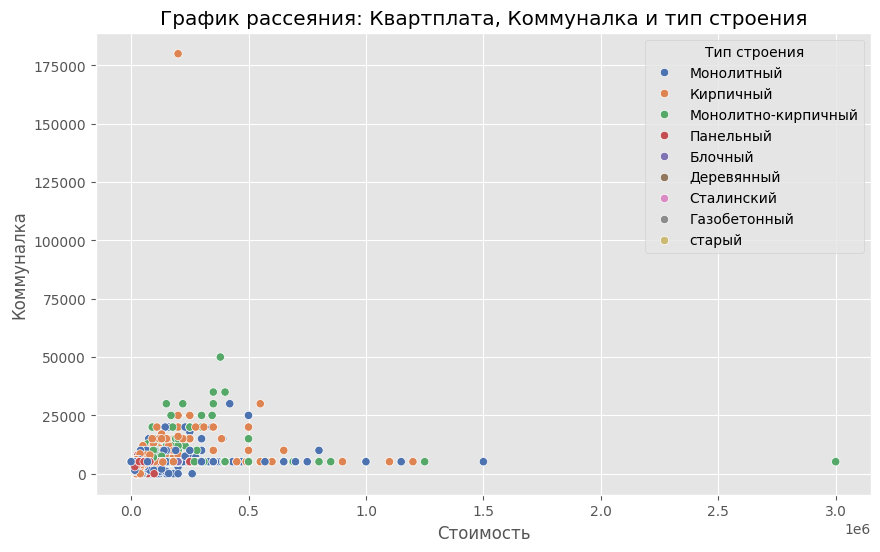

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fdf_filter, x='Квартплата', y='комм', hue='Тип строения', palette='deep')
# Настройка графика
plt.title('График рассеяния: Квартплата, Коммуналка и тип строения')
plt.xlabel('Стоимость')
plt.ylabel('Коммуналка')
plt.legend(title='Тип строения');

На данный момент заметен сильный разрыв в значениях, т.к. еще не исследовались данные на выбросы. 
Давайте тогда построим ящик с усами и посмотрим выбросы у Квартплаты и Залога. 

<Axes: xlabel='Тип строения', ylabel='value'>

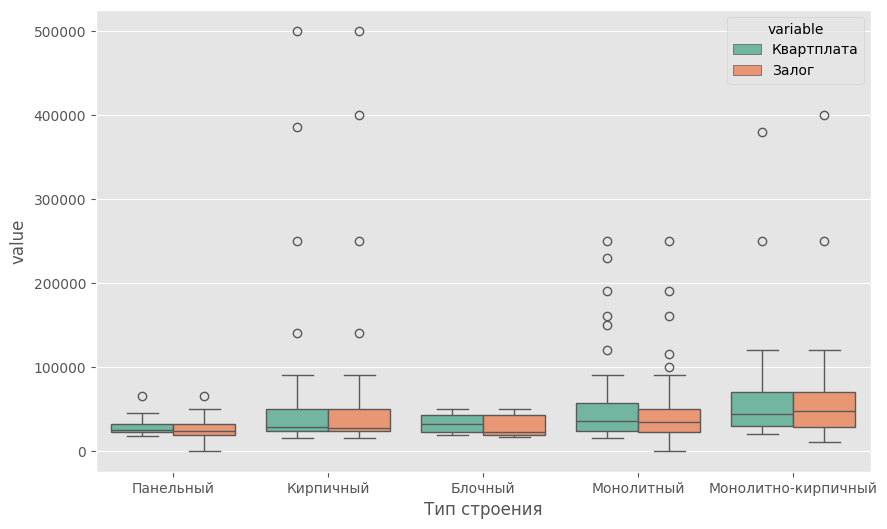

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fdf_filter.melt(id_vars='Тип строения', value_vars=['Квартплата', 'Залог']), 
             x='Тип строения', y='value', hue='variable', palette='Set2');


In [ ]:
Построим еще одни усы

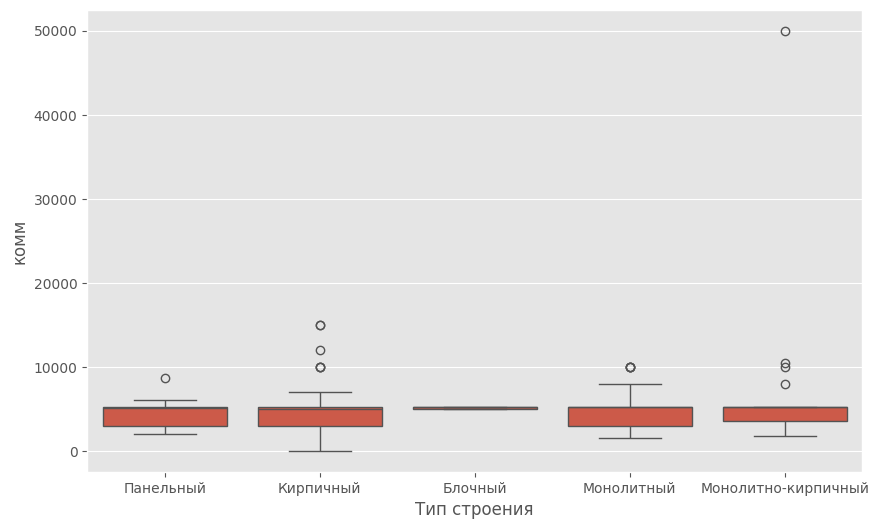

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fdf_filter, x='Тип строения', y = 'комм');

/tmp/ipykernel_88465/3145048255.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Тип строения');


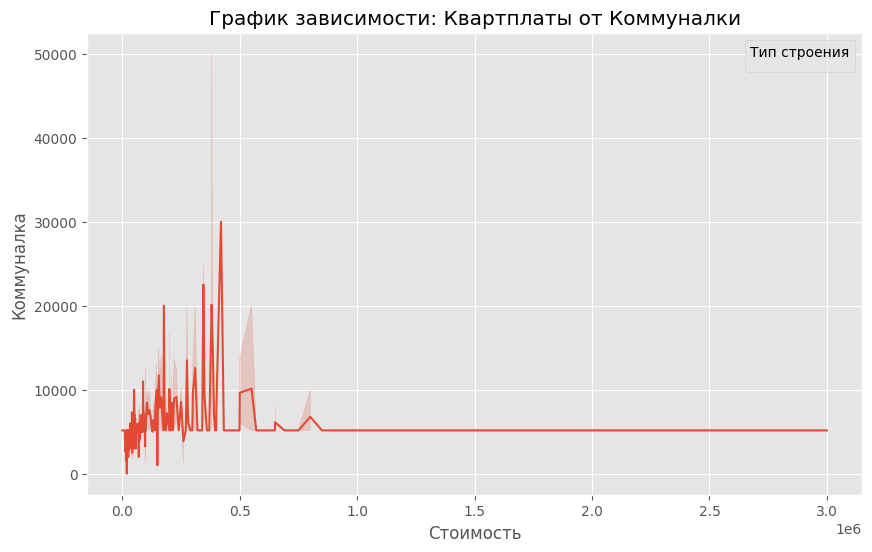

In [73]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = fdf_filter, x = 'Квартплата', y = 'комм');
# Настройка графика
plt.title('График зависимости: Квартплаты от Коммуналки')
plt.xlabel('Стоимость')
plt.ylabel('Коммуналка')
plt.legend(title='Тип строения');

Рассмотрим несколько гистограмм

Text(0.5, 1.0, 'Гистограмма. Наличие парковки')

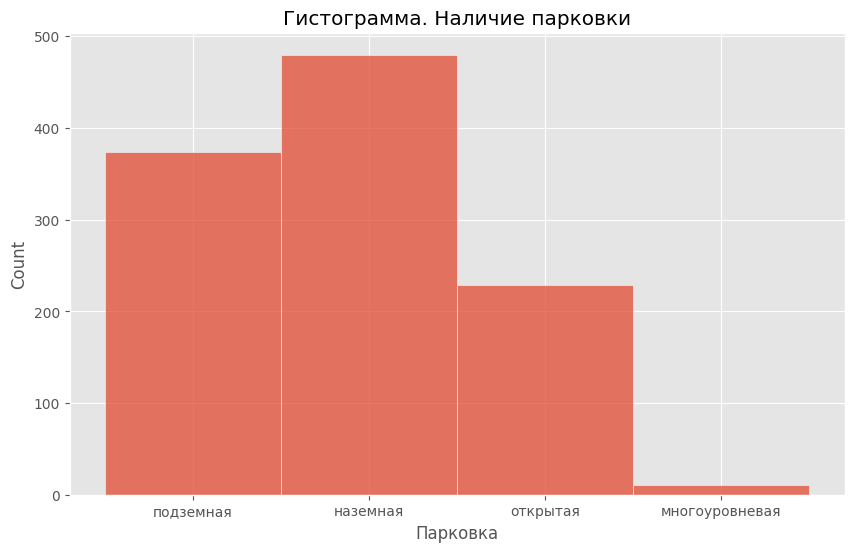

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(data = fdf_filter, x = 'Парковка');
plt.title('Гистограмма. Наличие парковки')

Text(0.5, 1.0, 'Гистограмма. Наличие ремонта')

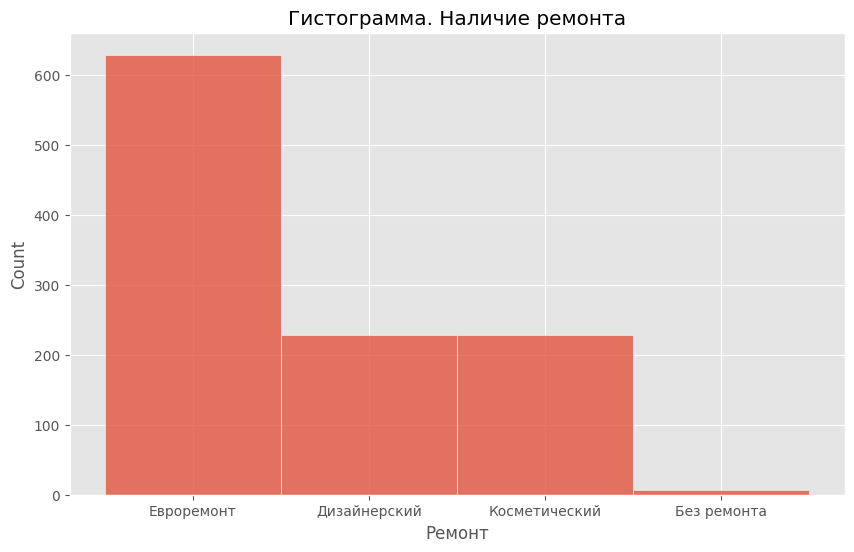

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(data = fdf_filter, x = 'Ремонт');
plt.title('Гистограмма. Наличие ремонта')

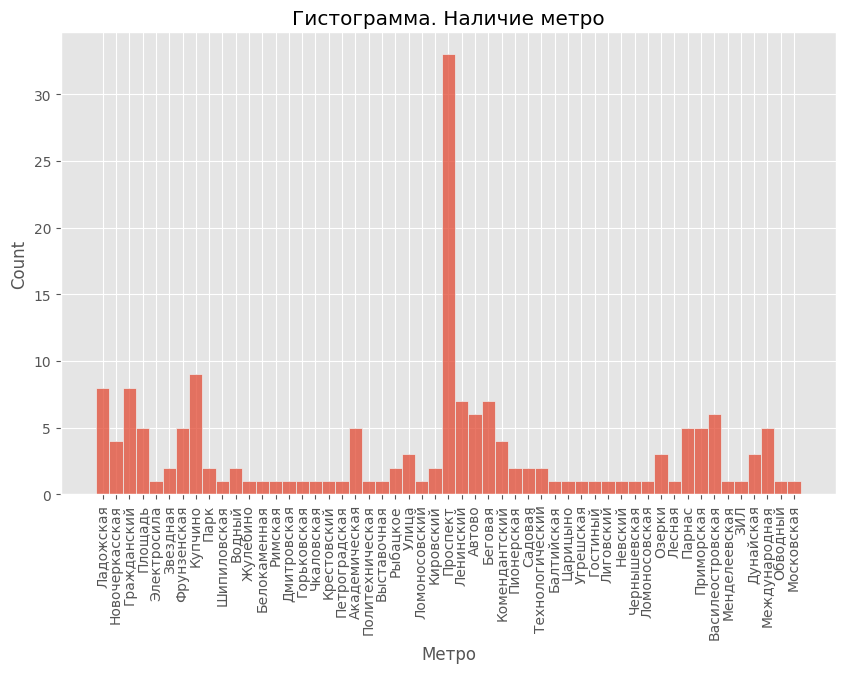

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(data = fdf_filter, x = 'Метро');
plt.title('Гистограмма. Наличие метро')
plt.xticks(rotation=90);

In [ ]:
Рассмотри график распределения

Text(0, 0.5, 'Общая площадь, м2')

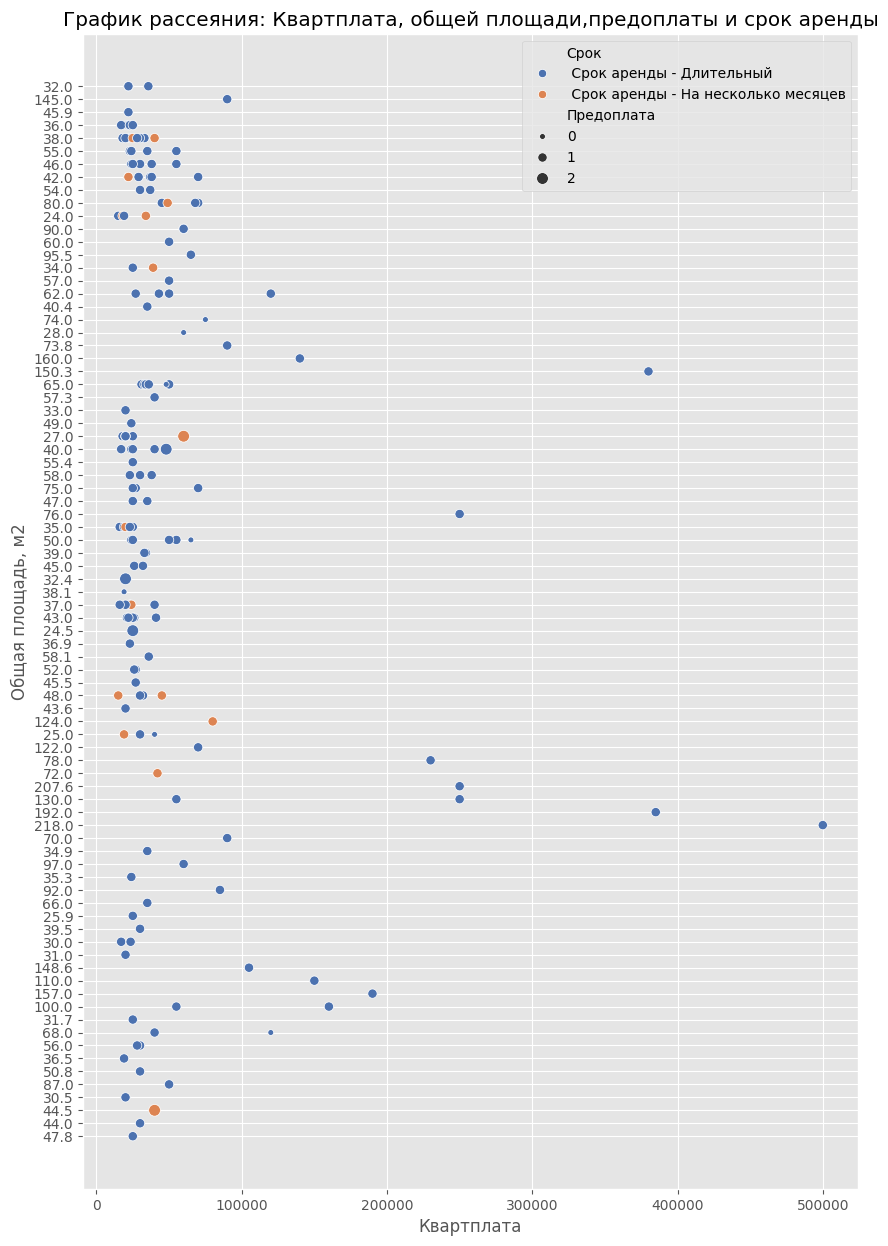

In [162]:
plt.figure(figsize=(10, 15))
sns.scatterplot(data=fdf_filter, x='Квартплата', y='Общая площадь, м2', hue='Срок', size = 'Предоплата', palette='deep')
# Настройка графика
plt.title('График рассеяния: Квартплата, общей площади,предоплаты и срок аренды')
plt.xlabel('Квартплата')
plt.ylabel('Общая площадь, м2')

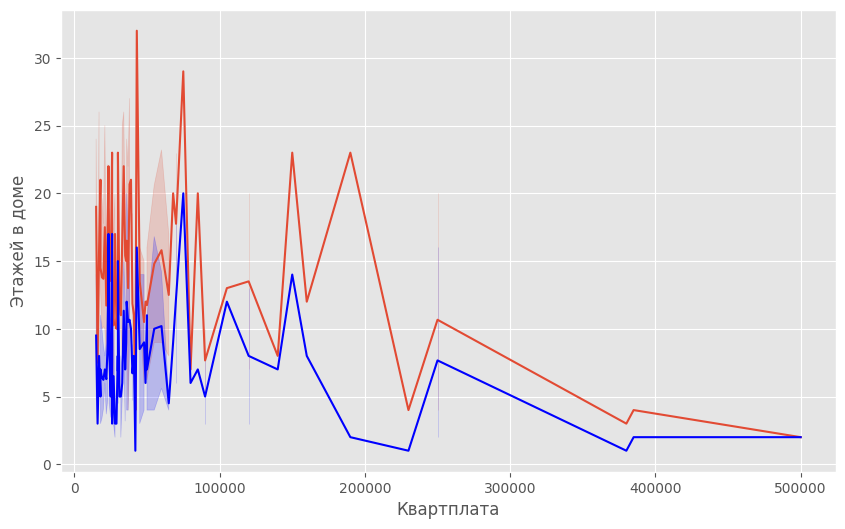

In [133]:
#Посмотрим зависит ли стоимость от количества этажей в доме. (кажется даже без учета выбросов заметно, что чем меньше этажей в доме, тем он дороже, но эта гипотеза которой требуется проверка)
plt.figure(figsize=(10, 6))
sns.lineplot(data = fdf_filter, x = 'Квартплата', y = 'Этажей в доме');
sns.lineplot(data = fdf_filter, x = 'Квартплата', y = 'Этаж', color = 'blue');

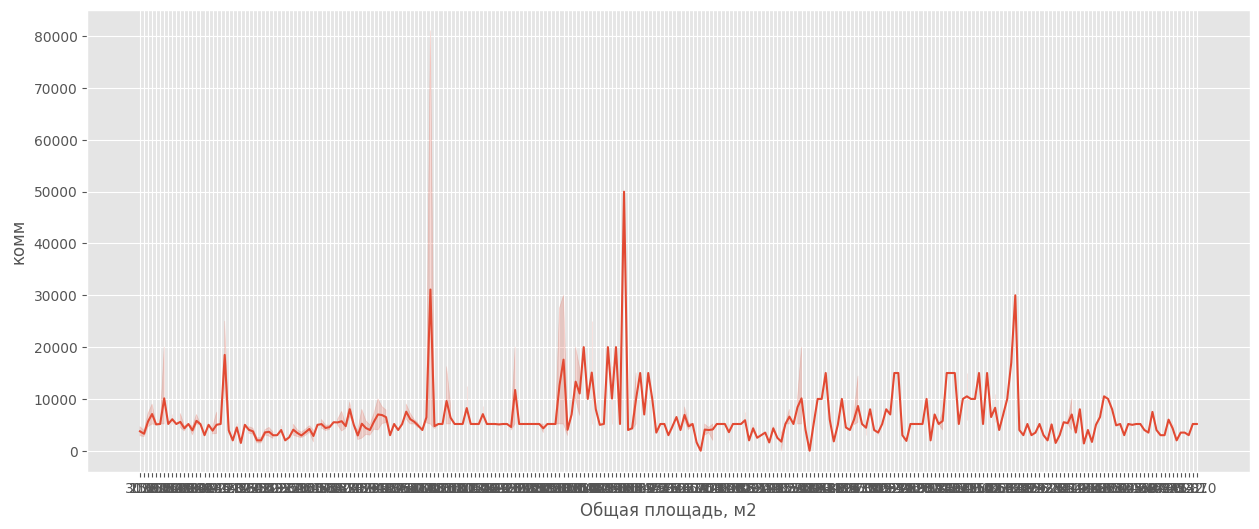

In [158]:
#гипотеза: увеличивается ли коммуналка от площади квартиры - ответ нет
plt.figure(figsize=(15, 6))
sns.lineplot(data = fdf_filter, x = 'Общая площадь, м2', y = 'комм');

## Для более достоверных сведений необходимо:
1. Удалить выбросы у Квартплаты, Залога, Коммуналки, Высота потолка
2. Для построения дальнейших зависимостей перевести данные в численные характеристики

# План дальнейшей работы: 
1. Подготовить данные для дальнейшей обработки
2. Исправить столбец метро (не уверена что есть в мск метро "проспект")
3. У столбца число комнат данные строковые
4. Заполнить столбец потолок. 0 заполнить средними значениями (но без учета этих нулей)
5. Отфильтровать данные по выбросам и прочее
6. Пока у меня 0 идей как связать этажи, мусоропровод, разрушающих ремонт существ и балкончики. надо подумать
7. Обязательно хочу сделать тепловую карту по всей нашей таблице, но для этого надо перевести ее в числовую
8. Важно, когда я ставлю фильтр на мусоропровод - отваливается очень много значений. надо подумать как правильно его использовать

# Гипотезы:
1. Чем меньше этажей в доме, тем дороже квартплата
2. Самый "популярный" вариант среди обявлений это квартиры размером 40-60 м2